In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/zalando-research/fashionmnist")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alvinb
Your Kaggle Key: ··········


100%|██████████| 68.8M/68.8M [00:00<00:00, 230MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.callbacks import  EarlyStopping

In [ ]:
df_train = pd.read_csv('/content/fashionmnist/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/fashionmnist/fashion-mnist_test.csv')

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


#Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

In [ ]:
x_train = df_train.drop('label',axis=1)
y_train = df_train['label']

x_test = df_test.drop('label',axis=1)
y_test = df_test['label']

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

In [ ]:
print("Train shape : "+str(x_train.shape))
print("Test shape : "+ str(x_test.shape))

Train shape : (60000, 28, 28)
Test shape : (10000, 28, 28)


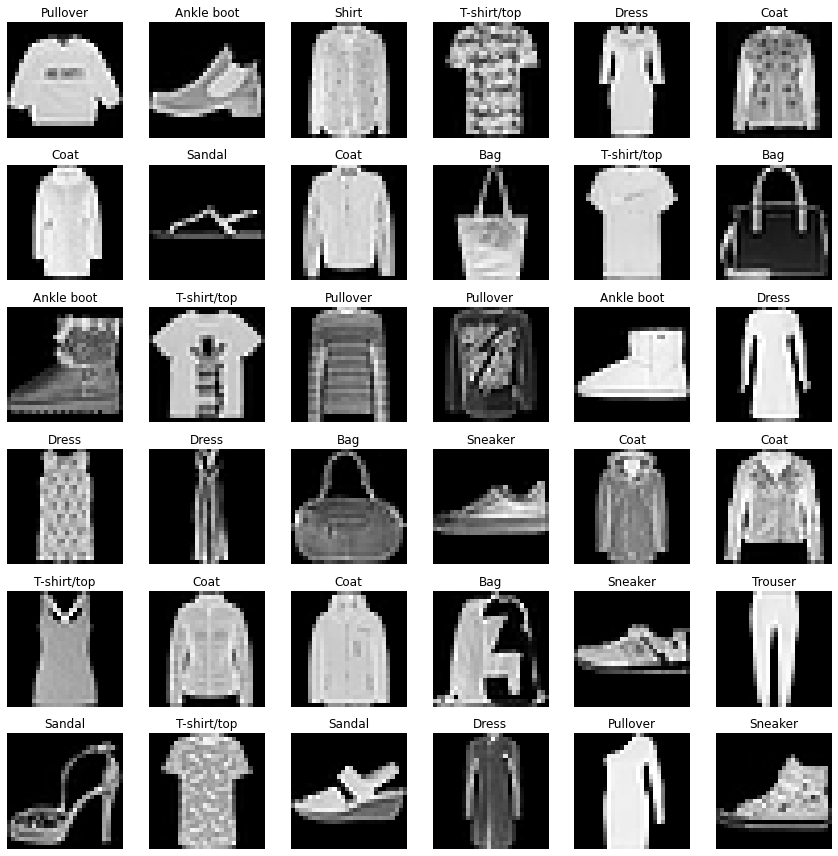

In [ ]:
labels_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal'
              ,'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,12))

for i in range(0, 48):
    plt.subplot(6,6,i + 1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(labels_list[y_train[i]])
    plt.axis("off")

plt.tight_layout()

plt.show()

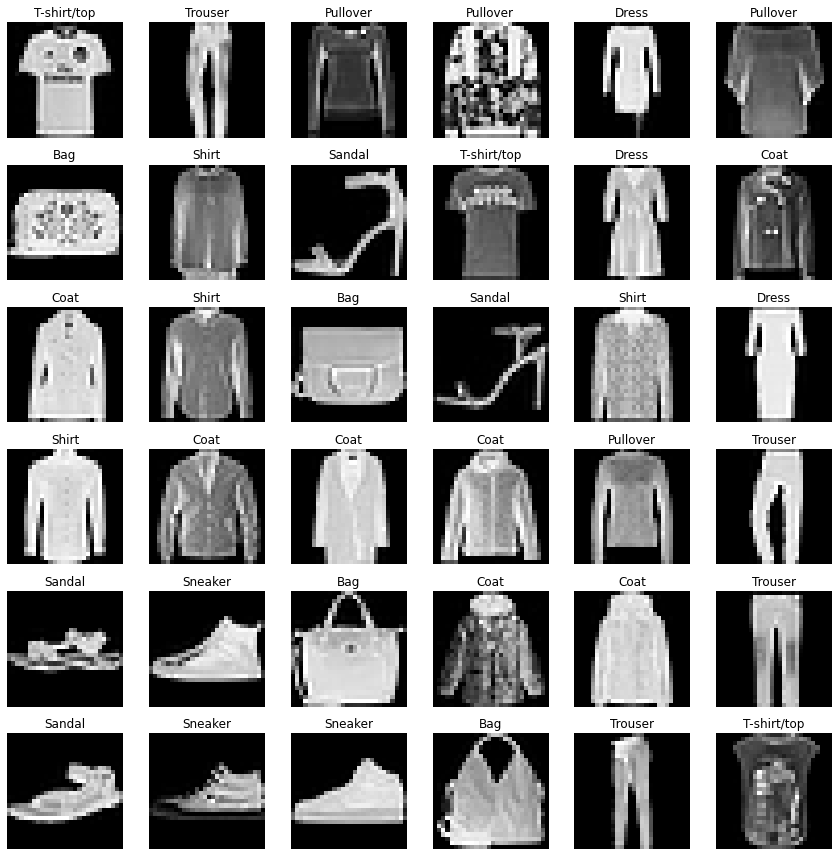

In [ ]:
labels_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal'
              ,'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,12))

for i in range(0, 48):
    plt.subplot(6,6,i + 1)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
    plt.title(labels_list[y_test[i]])
    plt.axis("off")

plt.tight_layout()

plt.show()

In [ ]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
print("Train shape : "+str(x_train.shape))
print("Test shape : "+ str(x_test.shape))

Train shape : (60000, 28, 28, 1)
Test shape : (10000, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_validation,y_train,y_validation = train_test_split(x_train,y_train,test_size = 0.2,stratify=y_train, random_state=2)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu', input_shape=(28, 28, 1),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Conv2D(128, kernel_size=3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Conv2D(128, kernel_size=3,activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2),padding='same'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 7, 7, 64)        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', #karena ini multiclass category
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAkurasi sudah diatas 93%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
hist = model.fit(X_train,y_train,validation_data=(X_validation,y_validation),callbacks=[callbacks],epochs=100)

Epoch 1/100
1500/1500 [==============================] - 123s 81ms/step - loss: 0.5759 - accuracy: 0.7887 - val_loss: 0.3765 - val_accuracy: 0.8622
Epoch 2/100
1500/1500 [==============================] - 121s 81ms/step - loss: 0.3787 - accuracy: 0.8614 - val_loss: 0.3030 - val_accuracy: 0.8882
Epoch 3/100
1500/1500 [==============================] - 121s 81ms/step - loss: 0.3314 - accuracy: 0.8798 - val_loss: 0.3184 - val_accuracy: 0.8836
Epoch 4/100
1500/1500 [==============================] - 121s 81ms/step - loss: 0.3088 - accuracy: 0.8860 - val_loss: 0.2877 - val_accuracy: 0.8959
Epoch 5/100
1500/1500 [==============================] - 120s 80ms/step - loss: 0.2927 - accuracy: 0.8936 - val_loss: 0.2643 - val_accuracy: 0.9060
Epoch 6/100
1500/1500 [==============================] - 121s 81ms/step - loss: 0.2759 - accuracy: 0.8989 - val_loss: 0.3046 - val_accuracy: 0.8897
Epoch 7/100
1500/1500 [==============================] - 121s 80ms/step - loss: 0.2626 - accuracy: 0.9032 - val_

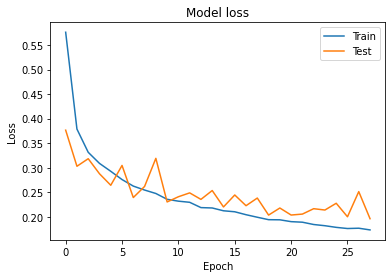

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

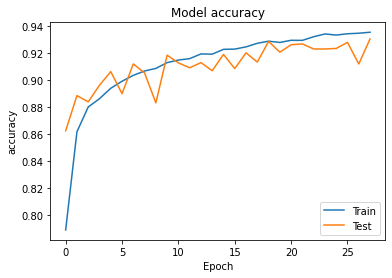

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

In [ ]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqjvwyc0b/assets


INFO:tensorflow:Assets written to: /tmp/tmpqjvwyc0b/assets
